<a href="https://colab.research.google.com/github/PrathvikNayak07/Project-Portfolio/blob/main/facial_expression_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision matplotlib

In [ ]:
# ✅ Step 1: Install and import libraries
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# ✅ Step 2: Define data paths
# Update to your actual folder paths:
train_dir = r"C:\Users\prath\OneDrive\Desktop\test"
test_dir = r"C:\Users\prath\OneDrive\Desktop\train"


In [ ]:
# ✅ Step 3: Define transforms
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((48, 48)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
# ✅ Step 4: Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Classes:", train_dataset.classes)

Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
# ✅ Step 5: Define CNN model
class FacialExpressionCNN(nn.Module):
    def __init__(self):
        super(FacialExpressionCNN, self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(128*6*6, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, len(train_dataset.classes))
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x


In [ ]:
# ✅ Step 6: Initialize model, loss and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FacialExpressionCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# ✅ Step 7: Training loop
num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {avg_loss:.4f}")

Epoch [1/30] - Loss: 1.7950
Epoch [2/30] - Loss: 1.6754
Epoch [3/30] - Loss: 1.5806
Epoch [4/30] - Loss: 1.5011
Epoch [5/30] - Loss: 1.4489
Epoch [6/30] - Loss: 1.4027
Epoch [7/30] - Loss: 1.3459
Epoch [8/30] - Loss: 1.2996
Epoch [9/30] - Loss: 1.2601
Epoch [10/30] - Loss: 1.2196
Epoch [11/30] - Loss: 1.1930
Epoch [12/30] - Loss: 1.1646
Epoch [13/30] - Loss: 1.1333
Epoch [14/30] - Loss: 1.1127
Epoch [15/30] - Loss: 1.0769
Epoch [16/30] - Loss: 1.0544
Epoch [17/30] - Loss: 1.0453
Epoch [18/30] - Loss: 1.0252
Epoch [19/30] - Loss: 1.0050
Epoch [20/30] - Loss: 0.9771
Epoch [21/30] - Loss: 0.9589
Epoch [22/30] - Loss: 0.9377
Epoch [23/30] - Loss: 0.9116
Epoch [24/30] - Loss: 0.8781
Epoch [25/30] - Loss: 0.8488
Epoch [26/30] - Loss: 0.8347
Epoch [27/30] - Loss: 0.8239
Epoch [28/30] - Loss: 0.7974
Epoch [29/30] - Loss: 0.7587
Epoch [30/30] - Loss: 0.7546


In [ ]:
# ✅ Step 8: Evaluate
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 52.75%


In [ ]:
# ✅ Step 9: Save model
torch.save(model.state_dict(), "facial_expression_cnn.pth")
print("Model saved successfully!")

Model saved successfully!


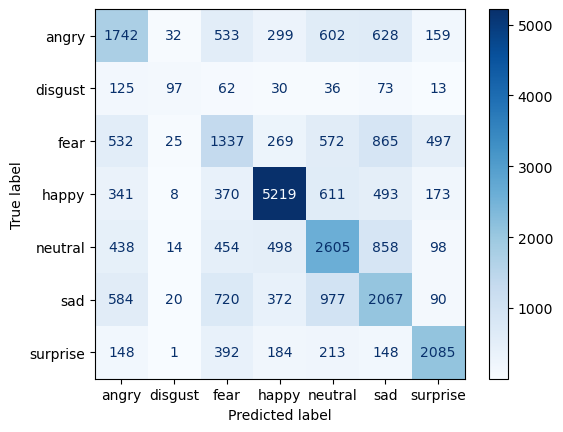

In [ ]:
# ✅ Step 10: Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

all_labels = []
all_preds = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.numpy())
        all_preds.extend(predicted.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.classes)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
!pip uninstall -y numpy opencv-python

Found existing installation: numpy 2.2.0
Uninstalling numpy-2.2.0:
  Successfully uninstalled numpy-2.2.0
Found existing installation: opencv-python 4.12.0.88
Uninstalling opencv-python-4.12.0.88:
  Successfully uninstalled opencv-python-4.12.0.88


In [ ]:
!pip install numpy==1.24.4

  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl (14.8 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [ ]:
!pip install opencv-python==4.7.0.72

   ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.2 MB 5.5 MB/s eta 0:00:07
   ---------------------------------------- 0.5/38.2 MB 5.6 MB/s eta 0:00:07
    --------------------------------------- 0.8/38.2 MB 6.7 MB/s eta 0:00:06
   - -------------------------------------- 1.4/38.2 MB 8.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.0/38.2 MB 9.3 MB/s eta 0:00:04
   -- ------------------------------------- 2.8/38.2 MB 11.3 MB/s eta 0:00:04
   --- ------------------------------------ 3.7/38.2 MB 11.9 MB/s eta 0:00:03
   ----- ---------------------------------- 5.0/38.2 MB 14.0 MB/s eta 0:00:03
   ------ --------------------------------- 6.3/38.2 MB 15.5 MB/s eta 0:00:03
   -------- ------------------------------- 7.9/38.2 MB 17.5 MB/s eta 0:00:02
   --------- ------------------------------ 9.5/38.2 MB 19.5 MB/s eta 0:00:02
   ------------ --------------------------- 11.7/38.2 MB 27.3 MB/s eta 0:00:0

In [ ]:
!pip install FuzzyTM==1.0.0

     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ---------------------------------- ----- 51.2/59.0 kB 2.7 MB/s eta 0:00:01
     ---------------------------------------- 59.0/59.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/60.3 kB ? eta -:--:--
   ---------------------------------------- 60.3/60.3 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
    --------------------------------------- 0.2/10.3 MB 4.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/10.3 MB 7.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/10.3 MB 7.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.3 MB 7.0 MB/s eta 0:00:02
   ---- ------------------------------

In [ ]:
import cv2
import numpy as np

print("✅ Installed OpenCV version:", cv2.__version__)
print("✅ Installed NumPy version:", np.__version__)

✅ Installed OpenCV version: 4.7.0
✅ Installed NumPy version: 1.26.4


In [ ]:
# Save the trained model
torch.save(model.state_dict(), "facial_expression_cnn.pth")


In [ ]:
import cv2
import torch
from torchvision import transforms
from PIL import Image  # Import PIL

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

model.load_state_dict(torch.load("facial_expression_cnn.pth", map_location=device))
model.to(device)
model.eval()

class_names = train_dataset.classes  # Make sure train_dataset is defined

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale (OpenCV) and then to PIL Image
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    pil_img = Image.fromarray(gray)  # Convert numpy ndarray to PIL Image

    # Apply transforms (resize, to tensor, etc)
    face_tensor = transform(pil_img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(face_tensor)
        _, predicted = torch.max(output, 1)
        label = class_names[predicted.item()]

    # Display label on original frame
    cv2.putText(frame, label, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 3)
    cv2.imshow("Facial Expression Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
